In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import chi2_contingency

In [2]:
# Import cleaned dataset
raw_data = pd.read_csv('../data/Crop_Data__train.csv')

In [3]:
raw_data.shape

(164986, 25)

In [4]:
raw_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,164986,30,UTTAR PRADESH,25759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
District,164986,516,TUMKUR,738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lat,164986,NaN,NaN,NaN,22.1978,5.59709,8.08783,18.5383,23.7214,26.3544,33.2203
Long,164986,NaN,NaN,NaN,80.5854,5.4176,69.611,76.5532,79.3863,83.8242,96.6535
GW_depth_Min,164986,NaN,NaN,NaN,2.9253,3.05719,-0.95,1.4,2.42,3.65,43.95
GW_depth_Max,164986,NaN,NaN,NaN,21.4036,17.2144,-0.21,10.82,17.25,25.68,128.15
Wells_depth_0_to_2,164986,NaN,NaN,NaN,1.27863,2.95843,0,0,0,1,51
Wells_depth_2_to_5,164986,NaN,NaN,NaN,6.93998,8.02365,0,2,4,10,48
Wells_depth_5_to_10,164986,NaN,NaN,NaN,12.1134,11.7355,0,3,9,17,67
Wells_depth_10_to_20,164986,NaN,NaN,NaN,6.7391,8.30502,0,1,4,10,77


In [5]:
numerical_features = raw_data.select_dtypes(exclude='object').columns
categorical_features = raw_data.select_dtypes(include='object').columns

In [6]:
numerical_features

Index(['Lat', 'Long', 'GW_depth_Min', 'GW_depth_Max', 'Wells_depth_0_to_2',
       'Wells_depth_2_to_5', 'Wells_depth_5_to_10', 'Wells_depth_10_to_20',
       'Wells_depth_20_to_40', 'Wells_depth_40_and_above', 'Precipitation',
       'Solar_Radiation', 'Surface_Pressure', 'Humidity', 'Temp_Max',
       'Temp_Min', 'Dew_Frost_Point', 'Wind_Speed', 'Year', 'Area',
       'Production'],
      dtype='object')

In [7]:
categorical_features

Index(['State', 'District', 'Season', 'Crop'], dtype='object')

In [8]:
df = raw_data.copy()


## Convert Production values to Log-Normal Form

During EDA we saw that log of 99.5% quantile of Production values had formed a perfect normal distribution.

In [9]:
def convert_to_log(data):
    return np.log(data + 1)

def convert_from_log(data):
    return np.exp(data) - 1

In [10]:
df['log_Production'] = convert_to_log(df['Production'])

/home/animathur/anaconda3/envs/py3-TF2/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_Production', ylabel='Density'>

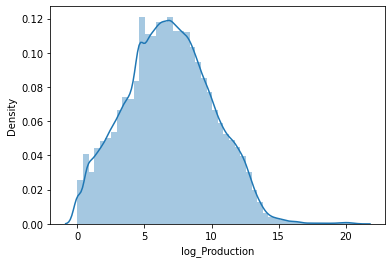

In [11]:
sns.distplot(df['log_Production'])

In [12]:
## Taking data with only 99.5% quantile of log_Production
df = df.loc[df['log_Production'] <= df['log_Production'].quantile(0.995)]

/home/animathur/anaconda3/envs/py3-TF2/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_Production', ylabel='Density'>

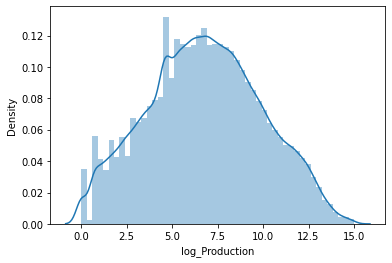

In [13]:
sns.distplot(df['log_Production'])

In [14]:
df.shape

(164161, 26)

## Lat and Long

We must consider Lat and Long as categorical features to avoid any bias in prediction value. This is because numerical values of latitide and longitude do not quantify the production of crop but only provide information of geographical location.

In [15]:
df[['Lat', 'Long']].nunique()

Lat     459
Long    459
dtype: int64

**Pipeline Action**

Based on cluster analysis and EDA we can seggregate Lat and Long values into six regions.

In [16]:
with open('./latlong_custerer_6.pkl', 'rb') as f:
    lat_long_clusterer = pickle.load(f)

In [17]:
def identify_geo_region(data, clusterer):
    '''
    Returns dataframe with column 'Geo_Region' identified from values of 'Lat' and 'Long' for each row.
    
    Parameters:
    data - Data frame which should have 'Lat' and 'Long' columns.
    clusterer - Clustering model for Lat and Long.
    '''
    data['Geo_Region'] = clusterer.predict(data[['Lat', 'Long']])
    
    region_map = {}
    
    for i, region in enumerate(df['Geo_Region'].unique()):
        region_map[i] = f'R{i}'
        
    data['Geo_Region'] = data['Geo_Region'].map(region_map).copy()
    
    return data

In [18]:
df = identify_geo_region(df, lat_long_clusterer)

In [19]:
df['Geo_Region'].value_counts().sort_index()

R0    33869
R1    37583
R2    25621
R3    30352
R4    14945
R5    21791
Name: Geo_Region, dtype: int64

In [20]:
df = df.drop(['Lat', 'Long'], axis=1)

In [21]:
# Get updated d_types
numerical_features = df.select_dtypes(exclude='object').columns
categorical_features = df.select_dtypes(include='object').columns

# Categorical Variables

In [22]:
categorical_features

Index(['State', 'District', 'Season', 'Crop', 'Geo_Region'], dtype='object')

## State and District

In [23]:
df['State'].nunique()

30

In [24]:
df['District'].nunique()

516

**Pipeline Action**

We can drop State and District columns as they are well represented by Geo_Region clusters.

Also being categorical input with many unique values, State and District would increase the feature set a lot.

In [25]:
df = df.drop(['State', 'District'], axis=1)

## Geo_Region

In [26]:
df['Geo_Region'].value_counts()

R1    37583
R0    33869
R3    30352
R2    25621
R5    21791
R4    14945
Name: Geo_Region, dtype: int64

<AxesSubplot:xlabel='Geo_Region', ylabel='log_Production'>

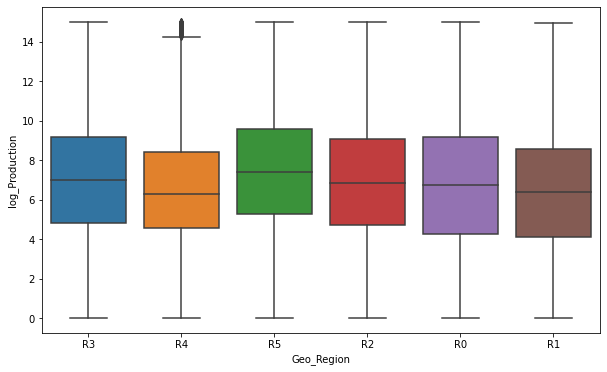

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(y='log_Production', x='Geo_Region', data=df)

In [28]:
# ANOVA test with log_Production
anova_result = smf.ols(formula='log_Production ~ C(Geo_Region)', data=df).fit()
anova_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_Production   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     251.3
Date:                Fri, 05 Feb 2021   Prob (F-statistic):          1.90e-268
Time:                        19:02:33   Log-Likelihood:            -4.2062e+05
No. Observations:              164161   AIC:                         8.412e+05
Df Residuals:                  164155   BIC:                         8.413e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.7393      0.017    395.350      0.000       6.706       6.773
C(Geo_Region)[T.R1]    -0.2667      0.024    -11.349      0.000      -0.313      -0.221
C(Geo_Region)[T.R2]     0.1639      0.026      6.312      0.000       0.113       0.215
C(Geo_Region)[T.R3]     0.2259      0.025      9.109      0.000       0.177       0.274
C(Geo_Region)[T.R4]    -0.2875      0.031     -9.332      0.000      -0.348      -0.227
C(Geo_Region)[T.R5]     0.5541      0.027     20.340      0.000       0.501       0.608
==============================================================================
Omnibus:                     4213.695   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2122.652
Skew:                           0.033   Prob(JB):                         0.00
Kurtosis:                       2.447   Cond. No.                         6.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Season

In [29]:
df['Season'].value_counts()

Kharif        63256
Rabi          44259
Whole Year    38389
Summer        10731
Winter         4180
Autumn         3346
Name: Season, dtype: int64

<AxesSubplot:xlabel='Season', ylabel='log_Production'>

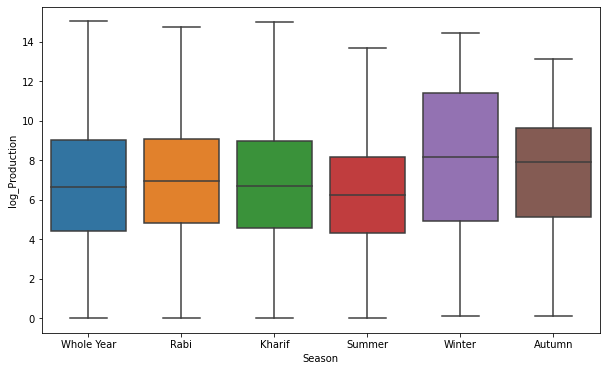

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(y='log_Production', x='Season', data=df)

In [31]:
# ANOVA test with log_Production
anova_result = smf.ols(formula='log_Production ~ C(Season)', data=df).fit()
anova_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_Production   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     224.7
Date:                Fri, 05 Feb 2021   Prob (F-statistic):          7.76e-240
Time:                        19:02:33   Log-Likelihood:            -4.2068e+05
No. Observations:              164161   AIC:                         8.414e+05
Df Residuals:                  164155   BIC:                         8.414e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.2056      0.054    132.808      0.000       7.099       7.312
C(Season)[T.Kharif]        -0.4804      0.056     -8.630      0.000      -0.590      -0.371
C(Season)[T.Rabi]          -0.2439      0.056     -4.335      0.000      -0.354      -0.134
C(Season)[T.Summer]        -1.0093      0.062    -16.242      0.000      -1.131      -0.887
C(Season)[T.Whole Year]    -0.4830      0.057     -8.538      0.000      -0.594      -0.372
C(Season)[T.Winter]         0.6739      0.073      9.256      0.000       0.531       0.817
==============================================================================
Omnibus:                     4694.481   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2271.511
Skew:                           0.020   Prob(JB):                         0.00
Kurtosis:                       2.425   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Crop

In [32]:
df['Crop'].nunique()

86

In [33]:
# ANOVA test with log_Production
anova_result = smf.ols(formula='log_Production ~ C(Crop)', data=df).fit()
anova_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_Production   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     881.0
Date:                Fri, 05 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:02:39   Log-Likelihood:            -3.9038e+05
No. Observations:              164161   AIC:                         7.809e+05
Df Residuals:                  164075   BIC:                         7.818e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                7.4944      0.674     11.121      0.000       6.174       8.815
C(Crop)[T.Arecanut]                     -0.3931      0.678     -0.580      0.562      -1.723       0.936
C(Crop)[T.Arhar/Tur]                    -0.7483      0.675     -1.109      0.267      -2.071       0.574
C(Crop)[T.Atcanut (Raw)]                 1.3429      0.925      1.452      0.146      -0.469       3.155
C(Crop)[T.Bajra]                        -0.2497      0.675     -0.370      0.712      -1.573       1.074
C(Crop)[T.Banana]                        1.5601      0.676      2.307      0.021       0.235       2.885
C(Crop)[T.Barley]                       -0.5509      0.676     -0.815      0.415      -1.875       0.773
C(Crop)[T.Beans & Mutter(Vegetable)]    -3.8055      0.717     -5.308      0.000      -5.211      -2.400
C(Crop)[T.Bhindi]                       -4.2028      0.701     -5.993      0.000      -5.577      -2.828
C(Crop)[T.Black pepper]                 -2.0104      0.681     -2.951      0.003      -3.345      -0.675
C(Crop)[T.Blackgram]                    -1.7874      0.770     -2.321      0.020      -3.297      -0.278
C(Crop)[T.Brinjal]                      -2.2204      0.692     -3.207      0.001      -3.578      -0.863
C(Crop)[T.Cabbage]                      -4.6142      0.708     -6.516      0.000      -6.002      -3.226
C(Crop)[T.Cardamom]                     -3.5614      0.692     -5.145      0.000      -4.918      -2.205
C(Crop)[T.Cashewnut]                    -1.8109      0.680     -2.663      0.008      -3.144      -0.478
C(Crop)[T.Cashewnut Processed]          -4.8331      0.902     -5.361      0.000      -6.600      -3.066
C(Crop)[T.Cashewnut Raw]                -1.7246      0.825     -2.089      0.037      -3.342      -0.107
C(Crop)[T.Castor seed]                  -2.9953      0.676     -4.431      0.000      -4.320      -1.670
C(Crop)[T.Citrus Fruit]                 -3.9450      0.696     -5.672      0.000      -5.308      -2.582
C(Crop)[T.Coconut ]                      2.7328      0.679      4.022      0.000       1.401       4.064
C(Crop)[T.Coffee]                        1.6898      1.469      1.150      0.250      -1.189       4.569
C(Crop)[T.Colocosia]                     0.2379      2.696      0.088      0.930      -5.046       5.521
C(Crop)[T.Coriander]                    -3.5623      0.676     -5.270      0.000      -4.887      -2.237
C(Crop)[T.Cotton(lint)]                  0.1660      0.675      0.246      0.806      -1.158       1.490
C(Crop)[T.Cowpea(Lobia)]                -3.1934      0.687     -4.647      0.000      -4.540      -1.847
C(Crop)[T.Drum Stick]                   -4.0833      0.725     -5.631      0.000      -5.505      -2.662
C(Crop)[T.Dry chillies]               

In [34]:
# Chi2 test
chi2_contingency(pd.crosstab(df['Crop'], df['Season']))

(227650.14111136392,
 0.0,
 425,
 array([[3.05736442e-01, 5.77993555e+00, 4.04410914e+00, 9.80531308e-01,
         3.50774545e+00, 3.81942118e-01],
        [2.29913804e+01, 4.34651153e+02, 3.04117007e+02, 7.37359543e+01,
         2.63782457e+02, 2.87220473e+01],
        [1.10167031e+02, 2.08270344e+03, 1.45722733e+03, 3.53318115e+02,
         1.26395761e+03, 1.37626476e+02],
        [3.46501301e-01, 6.55059362e+00, 4.58332369e+00, 1.11126882e+00,
         3.97544484e+00, 4.32867734e-01],
        [8.25896041e+01, 1.56135326e+03, 1.09244868e+03, 2.64874191e+02,
         9.47558970e+02, 1.03175297e+02],
        [4.61865851e+01, 8.73155597e+02, 6.10930087e+02, 1.48125596e+02,
         5.29903412e+02, 5.76987226e+01],
        [5.90275157e+01, 1.11591289e+03, 7.80782671e+02, 1.89307911e+02,
         6.77228721e+02, 7.37402915e+01],
        [2.32359696e+00, 4.39275102e+01, 3.07352294e+01, 7.45203794e+00,
         2.66588654e+01, 2.90276010e+00],
        [3.68921973e+00, 6.97445556e+01, 4.8798

Ideally crops are very much dependent on season. p-value of chi2 test validates this.

**Pipeline Action**

As per custer analysis and EDA, we can reduce the feature set by clustering both Season and Crop columns as Crop_Type.

In [35]:
with open('./crop_season_clusterer_6.pkl', 'rb') as f:
    crop_season_clusterer = pickle.load(f)

In [36]:
def identify_crop_types(data, clusterer):
    '''
    Returns dataframe with column 'Crop_Type' identified from values of 'Crop' and 'Season' for each row.
    
    Parameters:
    data - Dataframe which should have 'Crop' and 'Season' columns.
    clusterer - Clustering model for Crop and Season.
    '''
    data['Crop_Type'] = clusterer.predict(pd.get_dummies(data[['Crop', 'Season']].copy()))
    
    crop_type_map = {}
    
    for i, crop_type in enumerate(data['Crop_Type'].unique()):
        crop_type_map[i] = f'C{i}'
        
    data['Crop_Type'] = data['Crop_Type'].map(crop_type_map).copy()
    return data

In [37]:
df = identify_crop_types(df, crop_season_clusterer)

In [38]:
df['Crop_Type'].value_counts().sort_index()

C0     7525
C1    36329
C2    44259
C3    63256
C4     2061
C5    10731
Name: Crop_Type, dtype: int64

In [39]:
# ANOVA test with log_Production
anova_result = smf.ols(formula='log_Production ~ C(Crop_Type)', data=df).fit()
anova_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_Production   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     523.2
Date:                Fri, 05 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:02:40   Log-Likelihood:            -4.1995e+05
No. Observations:              164161   AIC:                         8.399e+05
Df Residuals:                  164155   BIC:                         8.400e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.5807      0.036    210.477      0.000       7.510       7.651
C(Crop_Type)[T.C1]    -0.7078      0.040    -17.886      0.000      -0.785      -0.630
C(Crop_Type)[T.C2]    -0.6190      0.039    -15.889      0.000      -0.695      -0.543
C(Crop_Type)[T.C3]    -0.8555      0.038    -22.455      0.000      -0.930      -0.781
C(Crop_Type)[T.C4]    -3.5092      0.078    -45.177      0.000      -3.661      -3.357
C(Crop_Type)[T.C5]    -1.3844      0.047    -29.469      0.000      -1.476      -1.292
==============================================================================
Omnibus:                     4144.411   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2080.424
Skew:                           0.010   Prob(JB):                         0.00
Kurtosis:                       2.449   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Note**

Looks like there is significant change in Adj. R-squared when we use cluster of crops and seasons.

For now we will continue using Crop_Type assuming that it can represent Crop and Season.

**To Do** 

Try forward selection for Crop, Season and Crop_Type seperately to validate the assumption in the end.

# Numerical Features

In [40]:
numerical_features

Index(['GW_depth_Min', 'GW_depth_Max', 'Wells_depth_0_to_2',
       'Wells_depth_2_to_5', 'Wells_depth_5_to_10', 'Wells_depth_10_to_20',
       'Wells_depth_20_to_40', 'Wells_depth_40_and_above', 'Precipitation',
       'Solar_Radiation', 'Surface_Pressure', 'Humidity', 'Temp_Max',
       'Temp_Min', 'Dew_Frost_Point', 'Wind_Speed', 'Year', 'Area',
       'Production', 'log_Production'],
      dtype='object')

**Pipeline Action**

Drop 'Year'column to avoid time-series factor.

In [41]:
# Drop Year column
df = df.drop('Year', axis=1)

In [42]:
# Get updated d_types
numerical_features = df.select_dtypes(exclude='object').columns
categorical_features = df.select_dtypes(include='object').columns

## Area

As per EDA, we saw that log Area had linear relationship with log_Production.

**Pipeline Action**

1. Create column log_Area as log of column Area.
2. Drop column Area.

In [84]:
df['log_Area'] = np.log(df['Area'] + 1)
df = df.drop('Area', axis=1)

<AxesSubplot:xlabel='log_Area', ylabel='log_Production'>

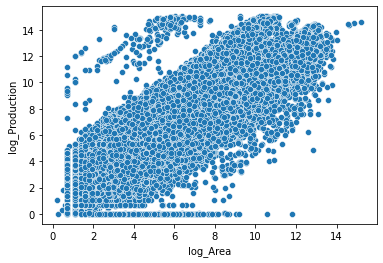

In [85]:
sns.scatterplot(x='log_Area', y='log_Production', data=df)

Hence, log_Area turns out to be an important feature. We will use it as first feature ro do forward selection.

In [92]:
smf.ols(formula='log_Production ~ log_Area', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_Production   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                 6.289e+05
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:25:03   Log-Likelihood:            -2.9196e+05
No. Observations:              164161   AIC:                         5.839e+05
Df Residuals:                  164159   BIC:                         5.839e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2537      0.009     28.274      0.000       0.236       0.271
log_Area       1.0019      0.001    793.043      0.000       0.999       1.004
==============================================================================
Omnibus:                    22433.495   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            74212.520
Skew:                           0.697   Prob(JB):                         0.00
Kurtosis:                       5.984   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
# Get updated d_types
numerical_features = df.select_dtypes(exclude='object').columns
categorical_features = df.select_dtypes(include='object').columns

## Check for multicollinearity

In [94]:
# VIF with all numerical columns
X_numerical = df[numerical_features].drop(['Production', 'log_Production'], axis=1)
X_numerical.columns

Index(['GW_depth_Min', 'GW_depth_Max', 'Wells_depth_0_to_2',
       'Wells_depth_2_to_5', 'Wells_depth_5_to_10', 'Wells_depth_10_to_20',
       'Wells_depth_20_to_40', 'Wells_depth_40_and_above', 'Precipitation',
       'Solar_Radiation', 'Surface_Pressure', 'Humidity', 'Temp_Max',
       'Temp_Min', 'Dew_Frost_Point', 'Wind_Speed', 'log_Area'],
      dtype='object')

In [95]:
def test_vif(data):
    vif_data = pd.DataFrame()
    vif_data['feature'] = data.columns
    vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

In [96]:
test_vif(X_numerical)

,feature,VIF
0,GW_depth_Min,2.410118
1,GW_depth_Max,6.886306
2,Wells_depth_0_to_2,2.216787
3,Wells_depth_2_to_5,4.750615
4,Wells_depth_5_to_10,4.522863
5,Wells_depth_10_to_20,3.545022
6,Wells_depth_20_to_40,3.100321
7,Wells_depth_40_and_above,1.839187
8,Precipitation,10.420871
9,Solar_Radiation,167.891710


### Only among features related to water resource

<AxesSubplot:>

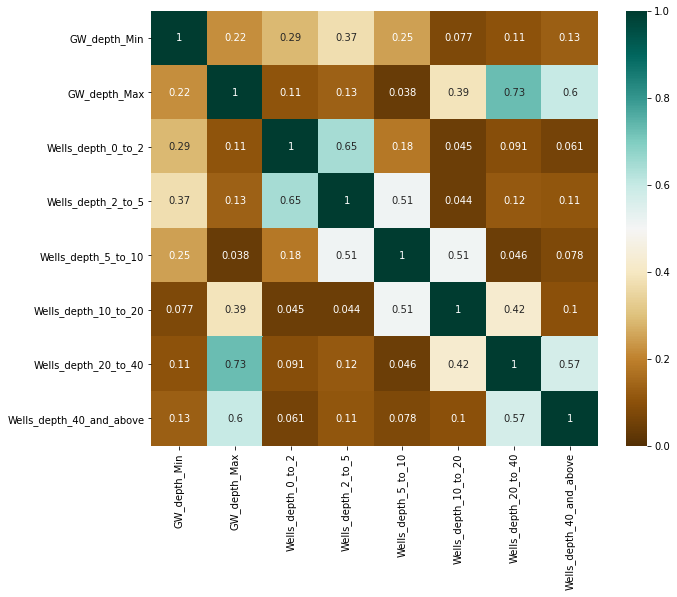

In [104]:
X_water = X_numerical[['GW_depth_Min', 'GW_depth_Max', 'Wells_depth_0_to_2',
       'Wells_depth_2_to_5', 'Wells_depth_5_to_10', 'Wells_depth_10_to_20',
       'Wells_depth_20_to_40', 'Wells_depth_40_and_above']]
plt.figure(figsize=(10, 8))
sns.heatmap(X_water.corr().abs(), annot=True, cmap=plt.cm.BrBG, vmin=0, vmax=1)

In [98]:
# VIF with features related to only water resources
test_vif(X_water)

,feature,VIF
0,GW_depth_Min,1.845133
1,GW_depth_Max,5.204883
2,Wells_depth_0_to_2,2.163746
3,Wells_depth_2_to_5,4.240354
4,Wells_depth_5_to_10,4.307797
5,Wells_depth_10_to_20,3.262948
6,Wells_depth_20_to_40,2.969650
7,Wells_depth_40_and_above,1.767062


**Note**

Considering high multicollinearity at values of VIF above 5.

GW_depth_Max shows the VIF of 5.204, which is negligibly higher than 5. Hence, we will retain it.

In [119]:
def ols_summary(cols, data):
    formula_str = "log_Production ~ "
    for col in cols:
        formula_str += f" + {col}"
    return smf.ols(formula=formula_str, data=df).fit().summary()

In [120]:
ols_summary(X_water.columns, X_water)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_Production   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     253.3
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:30:19   Log-Likelihood:            -4.2024e+05
No. Observations:              164161   AIC:                         8.405e+05
Df Residuals:                  164152   BIC:                         8.406e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    6.5041      0.019    347.703      0.000       6.467       6.541
GW_depth_Min                 0.0044      0.003      1.546      0.122      -0.001       0.010
GW_depth_Max                 0.0022      0.001      3.040      0.002       0.001       0.004
Wells_depth_0_to_2          -0.0314      0.004     -8.826      0.000      -0.038      -0.024
Wells_depth_2_to_5           0.0158      0.002     10.121      0.000       0.013       0.019
Wells_depth_5_to_10         -0.0089      0.001     -9.237      0.000      -0.011      -0.007
Wells_depth_10_to_20         0.0295      0.001     22.529      0.000       0.027       0.032
Wells_depth_20_to_40         0.0689      0.004     16.870      0.000       0.061       0.077
Wells_depth_40_and_above    -0.0669      0.004    -15.893      0.000      -0.075      -0.059
==============================================================================
Omnibus:                     4160.946   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2099.408
Skew:                           0.029   Prob(JB):                         0.00
Kurtosis:                       2.449   Cond. No.                         76.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Only among features related to climate

<AxesSubplot:>

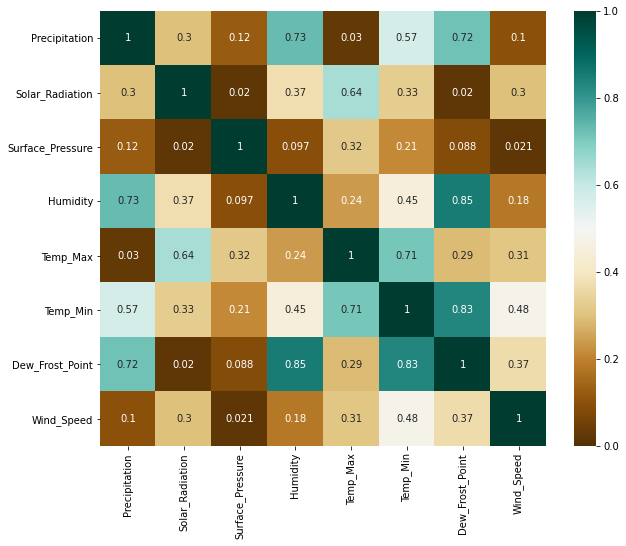

In [113]:
X_climate = X_numerical[['Precipitation',
       'Solar_Radiation', 'Surface_Pressure', 'Humidity', 'Temp_Max',
       'Temp_Min', 'Dew_Frost_Point', 'Wind_Speed']]

plt.figure(figsize=(10, 8))
sns.heatmap(X_climate.corr().abs(), annot=True, cmap=plt.cm.BrBG, vmin=0, vmax=1)

In [114]:
# VIF with features related to only climate
test_vif(X_climate)

,feature,VIF
0,Precipitation,10.126526
1,Solar_Radiation,162.093298
2,Surface_Pressure,798.687069
3,Humidity,447.630430
4,Temp_Max,742.189040
5,Temp_Min,516.726639
6,Dew_Frost_Point,313.737661
7,Wind_Speed,11.263729


**Note**

Taking correlation cut-off as 80.

We find following as highly correlated features:
1. Humidity vs. Dew_Frost_Point
2. Temp_Min vs Dew_Frost_Point

**Pipeline Action**

Drop column Dew_Frost_Point due to high correlation (above 80)

In [115]:
# Dropping column Dew_Frost_Point
X_climate = X_climate.drop('Dew_Frost_Point', axis=1)

<AxesSubplot:>

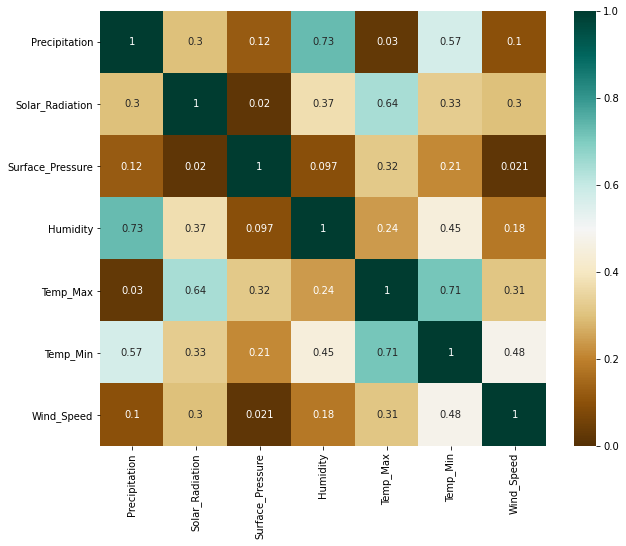

In [116]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_climate.corr().abs(), annot=True, cmap=plt.cm.BrBG, vmin=0, vmax=1)

In [117]:
# VIF of climate features after removing Dew_Frost_Point
test_vif(X_climate)

,feature,VIF
0,Precipitation,7.252842
1,Solar_Radiation,139.573595
2,Surface_Pressure,371.456060
3,Humidity,71.846062
4,Temp_Max,687.281854
5,Temp_Min,198.895912
6,Wind_Speed,10.826716


In [121]:
test_vif(X_climate.drop('Temp_Max', axis=1))

,feature,VIF
0,Precipitation,7.239759
1,Solar_Radiation,114.937386
2,Surface_Pressure,116.740302
3,Humidity,33.365662
4,Temp_Min,50.730654
5,Wind_Speed,10.377438


**Observations**

1. We could not see direct high correation among features based on correlation matrix.
2. VIF values are very high for features related to climate.
3. We cannot continue feature selection based on OLS summary due to high multicollinearity indicated by VIF on features related to climate.

Also, based upon EDA and analysis during Feature Engineering we saw that features except log-Area do not show linear relationship with log-Production (target).

**Next step**

Hence, we can try not to consider multicollinearity assuming the non-linearity factor and check importance of existing features using decision tree analysis.